# 🔤 Understanding Tokenization with TikToken
## A Deep Dive into How LLMs Process Text

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; color: white; text-align: center;">
    <h2>🧠 Learn How AI "Reads" Text</h2>
    <p>Discover the fascinating world of tokenization and why it matters for AI applications</p>
</div>

---

## 🎯 What You'll Learn

| Topic | Description | Key Insight |
|-------|-------------|-------------|
| **Basics** | What are tokens and why they matter | Understanding the fundamental unit of LLMs |
| **Word Breaking** | How text gets split into pieces | See tokenization in action |
| **Language Efficiency** | English vs French token usage | Not all languages are equal! |
| **Format Comparison** | JSON vs YAML tokenization | Choose the right format to save tokens |

---

## 🤔 Why Does Tokenization Matter?

```
Your Text  →  Tokenization  →  AI Model  →  Response
    │              │               │            │
    │              │               │            │
"Hello!"      [9906, 0]      Processing    Generation
```

### Key Reasons to Understand Tokenization:

1. **💰 Cost**: Most APIs charge per token, not per word
2. **📏 Limits**: Models have token limits (e.g., 128K tokens for GPT-4)
3. **⚡ Performance**: Fewer tokens = faster processing
4. **🌍 Language**: Different languages use different token counts
5. **📊 Format**: Data structure choices impact token efficiency

---

In [2]:
import tiktoken
import json
import yaml
import matplotlib.pyplot as plt
import numpy as np

print("✅ All imports successful!")
print(f"📚 TikToken version: {tiktoken.__version__}")

✅ All imports successful!
📚 TikToken version: 0.12.0


---

# 🎬 Part 1: Tokenization Basics

<div style="background-color:rgb(66, 148, 206); padding: 20px; border-left: 5px solid #2196F3; border-radius: 5px;">
    <h3>🎯 Learning Objectives</h3>
    <ul>
        <li>Understand what tokens are</li>
        <li>Learn how to initialize TikToken encoders</li>
        <li>See basic encoding and decoding examples</li>
    </ul>
</div>

## 🔍 What Are Tokens?

Tokens are the **fundamental units** that language models work with. They're not quite words, and not quite characters!

### Key Concepts:

- 🔤 **1 token ≈ 4 characters** in English
- 📝 **1 token ≈ ¾ of a word** on average
- 🌐 **Different for each language** (English is most efficient)
- 🔢 **Each token has a unique ID** (integer)

### Examples:

```
"Hello"        → 1 token  [9906]
"Hello World"  → 2 tokens [9906, 4435]
"tokenization" → 2 tokens [5963, 2065]
"AI"           → 1 token  [15836]
```

## 🔧 Initialize the Tokenizer

Different models use different tokenizers. Let's load the one used by GPT-4:

In [3]:
# Load the cl100k_base encoding used by GPT-4 and GPT-3.5-turbo
encoding = tiktoken.get_encoding("cl100k_base")

# Alternative: Load by model name
# encoding = tiktoken.encoding_for_model("gpt-4")

print("✅ Encoder loaded successfully!")
print(f"📊 Encoding name: {encoding.name}")
print(f"🔢 Vocabulary size: {encoding.n_vocab:,} tokens")

✅ Encoder loaded successfully!
📊 Encoding name: cl100k_base
🔢 Vocabulary size: 100,277 tokens


## 🎨 Your First Encoding Example

Let's see how a simple sentence gets tokenized:

In [4]:
# A simple sentence
text = "Hello, how are you today?"

# Encode to token IDs
tokens = encoding.encode(text)

# Decode back to text
decoded_text = encoding.decode(tokens)

print("📝 Original Text:")
print(f"   {text}")
print(f"\n🔢 Token IDs:")
print(f"   {tokens}")
print(f"\n📊 Number of tokens: {len(tokens)}")
print(f"\n🔄 Decoded Text:")
print(f"   {decoded_text}")
print(f"\n✅ Match: {text == decoded_text}")

📝 Original Text:
   Hello, how are you today?

🔢 Token IDs:
   [9906, 11, 1268, 527, 499, 3432, 30]

📊 Number of tokens: 7

🔄 Decoded Text:
   Hello, how are you today?

✅ Match: True


## 🛠️ Utility Functions

Let's create some helpful functions for our analysis:

In [ ]:
def count_tokens(text: str, encoding=encoding) -> int:
    """Count the number of tokens in a text."""
    return len(encoding.encode(text))


def visualize_tokens(text: str, encoding=encoding) -> None:
    """Visualize how text is broken into tokens."""
    tokens = encoding.encode(text)

    print(f"\n{'='*70}")
    print(f"Text: {text}")
    print(f"{'='*70}")
    print(f"Total tokens: {len(tokens)}\n")

    for i, token in enumerate(tokens, 1):
        decoded = encoding.decode([token])
        # Replace newlines and special chars for visibility
        decoded_display = decoded.replace("\n", "\\n").replace("\t", "\\t")
        print(f"Token {i:2d}: {token:6d} → '{decoded_display}'")

    print(f"{'='*70}\n")


def compare_texts(texts: dict[str, str], encoding=encoding) -> None:
    """Compare token counts for multiple texts."""
    results = []

    print(f"\n{'='*70}")
    print("📊 Token Count Comparison")
    print(f"{'='*70}\n")

    for label, text in texts.items():
        token_count = count_tokens(text, encoding)
        char_count = len(text)
        ratio = char_count / token_count if token_count > 0 else 0

        results.append(
            {"label": label, "tokens": token_count, "chars": char_count, "ratio": ratio}
        )

        print(f"{label}:")
        print(f"  📝 Text: {text[:60]}{'...' if len(text) > 60 else ''}")
        print(f"  🔢 Tokens: {token_count}")
        print(f"  📏 Characters: {char_count}")
        print(f"  📊 Chars per token: {ratio:.2f}")
        print()

    return results


print("✅ Utility functions defined!")

✅ Utility functions defined!


---

# 🔨 Part 2: How Text Gets Broken Into Pieces

<div style="background-color:rgb(195, 103, 210); padding: 20px; border-left: 5px solid #9c27b0; border-radius: 5px;">
    <h3>🎯 Learning Objectives</h3>
    <ul>
        <li>Visualize word breaking and subword units</li>
        <li>Understand common vs rare word tokenization</li>
        <li>See how punctuation and special characters are handled</li>
    </ul>
</div>

## 🔍 Common Words vs Rare Words

Common words typically get their own token, while rare or complex words get split:

In [ ]:
# Common words (usually 1 token each)
common_examples = [
    "hello",
    "world",
    "Python",
    "computer",
    "the",
]

print("📗 COMMON WORDS (Usually 1 token)\n")
for word in common_examples:
    tokens = encoding.encode(word)
    print(f"  '{word:12s}' → {len(tokens)} token(s): {tokens}")

print("\n" + "=" * 70 + "\n")

# Rare/complex words (usually multiple tokens)
rare_examples = [
    "tokenization",
    "antidisestablishmentarianism",
    "cryptocurrency",
    "TikToken",
    "GPT-4",
]

print("📕 RARE/COMPLEX WORDS (Multiple tokens)\n")
for word in rare_examples:
    tokens = encoding.encode(word)
    token_pieces = [encoding.decode([t]) for t in tokens]
    print(f"  '{word:30s}' → {len(tokens)} token(s)")
    print(f"      Pieces: {' | '.join(repr(p) for p in token_pieces)}")
    print()

📗 COMMON WORDS (Usually 1 token)

  'hello       ' → 1 token(s): [15339]
  'world       ' → 1 token(s): [14957]
  'Python      ' → 1 token(s): [31380]
  'computer    ' → 1 token(s): [44211]
  'the         ' → 1 token(s): [1820]


📕 RARE/COMPLEX WORDS (Multiple tokens)

  'tokenization                  ' → 2 token(s)
      Pieces: 'token' | 'ization'

  'antidisestablishmentarianism  ' → 6 token(s)
      Pieces: 'ant' | 'idis' | 'establish' | 'ment' | 'arian' | 'ism'

  'cryptocurrency                ' → 2 token(s)
      Pieces: 'crypt' | 'ocurrency'

  'TikToken                      ' → 3 token(s)
      Pieces: 'T' | 'ik' | 'Token'

  'GPT-4                         ' → 4 token(s)
      Pieces: 'G' | 'PT' | '-' | '4'



## 🎨 Detailed Token Breakdown

Let's see exactly how different types of text get tokenized:

In [7]:
# Example 1: Simple sentence
visualize_tokens("The quick brown fox jumps.")


Text: The quick brown fox jumps.
Total tokens: 6

Token  1:    791 → 'The'
Token  2:   4062 → ' quick'
Token  3:  14198 → ' brown'
Token  4:  39935 → ' fox'
Token  5:  35308 → ' jumps'
Token  6:     13 → '.'



In [8]:
# Example 2: Punctuation and special characters
visualize_tokens("Hello! How are you? I'm fine, thanks.")


Text: Hello! How are you? I'm fine, thanks.
Total tokens: 12

Token  1:   9906 → 'Hello'
Token  2:      0 → '!'
Token  3:   2650 → ' How'
Token  4:    527 → ' are'
Token  5:    499 → ' you'
Token  6:     30 → '?'
Token  7:    358 → ' I'
Token  8:   2846 → ''m'
Token  9:   7060 → ' fine'
Token 10:     11 → ','
Token 11:   9523 → ' thanks'
Token 12:     13 → '.'



In [9]:
# Example 3: Code-like text
visualize_tokens("def hello_world(): print('Hello!')")


Text: def hello_world(): print('Hello!')
Total tokens: 9

Token  1:    755 → 'def'
Token  2:  24748 → ' hello'
Token  3:  32892 → '_world'
Token  4:   4658 → '():'
Token  5:   1194 → ' print'
Token  6:    493 → '(''
Token  7:   9906 → 'Hello'
Token  8:      0 → '!'
Token  9:    873 → '')'



In [10]:
# Example 4: Numbers and dates
visualize_tokens("The year 2024 and the number 123,456.78")


Text: The year 2024 and the number 123,456.78
Total tokens: 14

Token  1:    791 → 'The'
Token  2:   1060 → ' year'
Token  3:    220 → ' '
Token  4:   2366 → '202'
Token  5:     19 → '4'
Token  6:    323 → ' and'
Token  7:    279 → ' the'
Token  8:   1396 → ' number'
Token  9:    220 → ' '
Token 10:   4513 → '123'
Token 11:     11 → ','
Token 12:  10961 → '456'
Token 13:     13 → '.'
Token 14:   2495 → '78'



In [11]:
# Example 5: Numbers and dates
visualize_tokens("13+27=40")


Text: 13+27=40
Total tokens: 5

Token  1:   1032 → '13'
Token  2:     10 → '+'
Token  3:   1544 → '27'
Token  4:     28 → '='
Token  5:   1272 → '40'



In [12]:
# Example 5: Numbers and dates
visualize_tokens("13000+27=13027")


Text: 13000+27=13027
Total tokens: 7

Token  1:   5894 → '130'
Token  2:    410 → '00'
Token  3:     10 → '+'
Token  4:   1544 → '27'
Token  5:     28 → '='
Token  6:   5894 → '130'
Token  7:   1544 → '27'



## 🔎 Interesting Tokenization Patterns

### Pattern 1: Spaces Matter! 🌟

In [ ]:
# Leading spaces change tokenization
examples = [
    "world",  # No space
    " world",  # With space
    "  world",  # Two spaces
]

print("🔍 How spaces affect tokenization:\n")
for example in examples:
    tokens = encoding.encode(example)
    print(f"  '{example}' → {tokens}")

🔍 How spaces affect tokenization:

  'world' → [14957]
  ' world' → [1917]
  '  world' → [220, 1917]


### Pattern 2: Case Sensitivity 🔠

In [14]:
# Different cases = different tokens
examples = [
    "HELLO",
    "Hello",
    "hello",
    "HeLLo",
]

print("🔍 Case sensitivity in tokenization:\n")
for example in examples:
    tokens = encoding.encode(example)
    print(f"  '{example:8s}' → {tokens}")

🔍 Case sensitivity in tokenization:

  'HELLO   ' → [51812, 1623]
  'Hello   ' → [9906]
  'hello   ' → [15339]
  'HeLLo   ' → [1548, 4178, 78]


### Pattern 3: Emojis and Unicode 😊🎉

In [ ]:
# Emojis often take multiple tokens
examples = [
    "Hello 😊",
    "🎉🎊🎈",
    "Python 🐍",
    "café",  # Accented character
    "中文",  # Chinese characters
]

print("🔍 Emojis and Unicode characters:\n")
for example in examples:
    tokens = encoding.encode(example)
    print(f"  '{example:15s}' → {len(tokens):2d} token(s): {tokens}")

🔍 Emojis and Unicode characters:

  'Hello 😊        ' →  3 token(s): [9906, 27623, 232]
  '🎉🎊🎈            ' →  9 token(s): [9468, 236, 231, 9468, 236, 232, 9468, 236, 230]
  'Python 🐍       ' →  4 token(s): [31380, 11410, 238, 235]
  'café           ' →  2 token(s): [936, 59958]
  '中文             ' →  2 token(s): [16325, 17161]


---

# 🌍 Part 3: English vs French Token Efficiency

<div style="background-color:rgb(174, 123, 41); padding: 20px; border-left: 5px solid #ff9800; border-radius: 5px;">
    <h3>🎯 Key Finding</h3>
    <p><strong>English text typically requires fewer tokens than equivalent text in other languages!</strong></p>
    <p>This is because the tokenizer was trained primarily on English text.</p>
</div>

## 🤔 Why Does This Matter?

```
💰 Same meaning, different costs!

English:  "Hello, how are you?" → 6 tokens
French:   "Bonjour, comment allez-vous?" → 8 tokens

Cost impact: 33% more expensive in French! 💸
```

### Real-World Implications:

1. **💰 API Costs**: Non-English languages cost more per message
2. **📏 Context Windows**: Reach token limits faster
3. **⚡ Performance**: Longer processing times
4. **🎯 Optimization**: Need to be more careful with prompts

---

## 🧪 Experiment: Same Sentences, Different Languages

Let's compare token usage across multiple equivalent sentences:

In [ ]:
# Example 1: Simple greeting
sentences_1 = {
    "English": "Hello, how are you today?",
    "French": "Bonjour, comment allez-vous aujourd'hui?",
}

print("\n" + "=" * 70)
print("🗣️ EXAMPLE 1: Simple Greeting")
results_1 = compare_texts(sentences_1)


🗣️ EXAMPLE 1: Simple Greeting

📊 Token Count Comparison

English:
  📝 Text: Hello, how are you today?
  🔢 Tokens: 7
  📏 Characters: 25
  📊 Chars per token: 3.57

French:
  📝 Text: Bonjour, comment allez-vous aujourd'hui?
  🔢 Tokens: 9
  📏 Characters: 40
  📊 Chars per token: 4.44



In [ ]:
# Example 2: Technical description
sentences_2 = {
    "English": "Machine learning is a subset of artificial intelligence that enables computers to learn from data.",
    "French": "L'apprentissage automatique est un sous-ensemble de l'intelligence artificielle qui permet aux ordinateurs d'apprendre à partir de données.",
}

print("\n" + "=" * 70)
print("🗣️ EXAMPLE 2: Technical Description")
results_2 = compare_texts(sentences_2)


🗣️ EXAMPLE 2: Technical Description

📊 Token Count Comparison

English:
  📝 Text: Machine learning is a subset of artificial intelligence that...
  🔢 Tokens: 16
  📏 Characters: 98
  📊 Chars per token: 6.12

French:
  📝 Text: L'apprentissage automatique est un sous-ensemble de l'intell...
  🔢 Tokens: 35
  📏 Characters: 139
  📊 Chars per token: 3.97



In [ ]:
# Example 3: Longer paragraph
sentences_3 = {
    "English": "The quick brown fox jumps over the lazy dog. This sentence contains every letter of the alphabet and is commonly used for testing fonts and keyboards.",
    "French": "Le renard brun rapide saute par-dessus le chien paresseux. Cette phrase contient chaque lettre de l'alphabet et est couramment utilisée pour tester les polices et les claviers.",
}

print("\n" + "=" * 70)
print("🗣️ EXAMPLE 3: Longer Paragraph")
results_3 = compare_texts(sentences_3)


🗣️ EXAMPLE 3: Longer Paragraph

📊 Token Count Comparison

English:
  📝 Text: The quick brown fox jumps over the lazy dog. This sentence c...
  🔢 Tokens: 28
  📏 Characters: 150
  📊 Chars per token: 5.36

French:
  📝 Text: Le renard brun rapide saute par-dessus le chien paresseux. C...
  🔢 Tokens: 45
  📏 Characters: 176
  📊 Chars per token: 3.91



## 📊 Detailed Token Breakdown

In [19]:
# Detailed breakdown - English
print("\n🇬🇧 ENGLISH TOKENIZATION:")
visualize_tokens("Hello, how are you today?")


🇬🇧 ENGLISH TOKENIZATION:

Text: Hello, how are you today?
Total tokens: 7

Token  1:   9906 → 'Hello'
Token  2:     11 → ','
Token  3:   1268 → ' how'
Token  4:    527 → ' are'
Token  5:    499 → ' you'
Token  6:   3432 → ' today'
Token  7:     30 → '?'



In [20]:
# Detailed breakdown - French
print("\n🇫🇷 FRENCH TOKENIZATION:")
visualize_tokens("Bonjour, comment allez-vous aujourd'hui?")


🇫🇷 FRENCH TOKENIZATION:

Text: Bonjour, comment allez-vous aujourd'hui?
Total tokens: 9

Token  1:  82681 → 'Bonjour'
Token  2:     11 → ','
Token  3:   4068 → ' comment'
Token  4:  12584 → ' alle'
Token  5:     89 → 'z'
Token  6:  45325 → '-vous'
Token  7:  75804 → ' aujourd'
Token  8:  88253 → ''hui'
Token  9:     30 → '?'



## 📈 Visual Comparison

Let's create a bar chart to visualize the difference:

/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_85419/179931104.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(names, rotation=45, ha='right')
/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_85419/179931104.py:90: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_85419/179931104.py:90: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_85419/179931104.py:90: UserWarning: Glyph 127467 (\N{REGIONAL INDICATOR SYMBOL LETTER F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_85419/179931104.py:90: UserWarning: Glyph 127479 (\N{REGIONAL IND

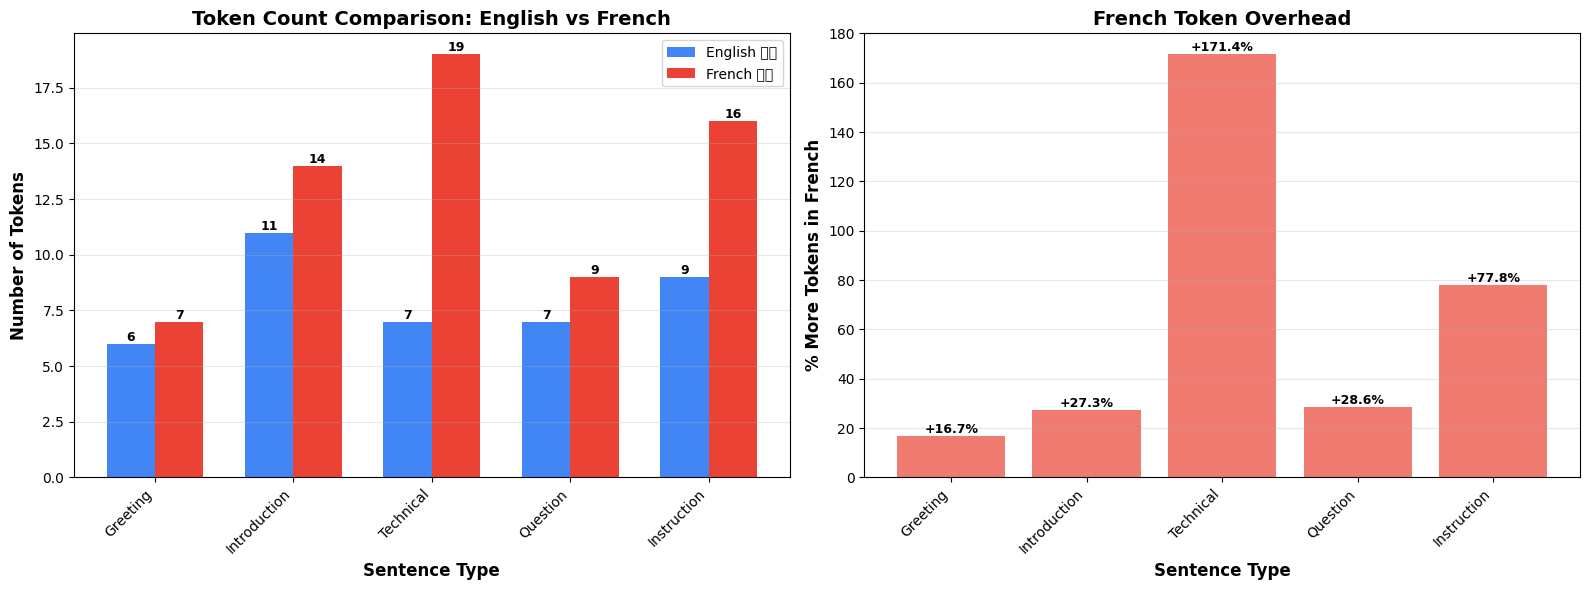


📊 SUMMARY STATISTICS
Average English tokens: 8.0
Average French tokens:  13.0
Average increase:       64.3%

💡 On average, French uses 64.3% more tokens than English!


In [ ]:
# Prepare data for comprehensive comparison
test_cases = [
    {
        "name": "Greeting",
        "en": "Hello, how are you?",
        "fr": "Bonjour, comment allez-vous?",
    },
    {
        "name": "Introduction",
        "en": "My name is John and I live in New York.",
        "fr": "Je m'appelle Jean et j'habite à New York.",
    },
    {
        "name": "Technical",
        "en": "Machine learning algorithms process large datasets.",
        "fr": "Les algorithmes d'apprentissage automatique traitent de grands ensembles de données.",
    },
    {
        "name": "Question",
        "en": "What time does the store close?",
        "fr": "À quelle heure ferme le magasin?",
    },
    {
        "name": "Instruction",
        "en": "Please send me the report by tomorrow morning.",
        "fr": "Veuillez m'envoyer le rapport d'ici demain matin.",
    },
]

# Calculate tokens for each
names = []
en_tokens = []
fr_tokens = []
differences = []

for case in test_cases:
    names.append(case["name"])
    en_count = count_tokens(case["en"])
    fr_count = count_tokens(case["fr"])
    en_tokens.append(en_count)
    fr_tokens.append(fr_count)
    differences.append(fr_count - en_count)

# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left chart: Token comparison
x = np.arange(len(names))
width = 0.35

bars1 = ax1.bar(x - width / 2, en_tokens, width, label="English 🇬🇧", color="#4285f4")
bars2 = ax1.bar(x + width / 2, fr_tokens, width, label="French 🇫🇷", color="#ea4335")

ax1.set_xlabel("Sentence Type", fontsize=12, fontweight="bold")
ax1.set_ylabel("Number of Tokens", fontsize=12, fontweight="bold")
ax1.set_title(
    "Token Count Comparison: English vs French", fontsize=14, fontweight="bold"
)
ax1.set_xticks(x)
ax1.set_xticklabels(names, rotation=45, ha="right")
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold",
        )

# Right chart: Percentage increase
percentage_increase = [(fr - en) / en * 100 for en, fr in zip(en_tokens, fr_tokens)]
colors = ["#ea4335" if x > 0 else "#34a853" for x in percentage_increase]

bars3 = ax2.bar(names, percentage_increase, color=colors, alpha=0.7)
ax2.axhline(y=0, color="black", linestyle="-", linewidth=0.5)
ax2.set_xlabel("Sentence Type", fontsize=12, fontweight="bold")
ax2.set_ylabel("% More Tokens in French", fontsize=12, fontweight="bold")
ax2.set_title("French Token Overhead", fontsize=14, fontweight="bold")
ax2.set_xticklabels(names, rotation=45, ha="right")
ax2.grid(axis="y", alpha=0.3)

# Add value labels
for bar, val in zip(bars3, percentage_increase):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:+.1f}%",
        ha="center",
        va="bottom" if height > 0 else "top",
        fontsize=9,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Print summary statistics
avg_en = np.mean(en_tokens)
avg_fr = np.mean(fr_tokens)
avg_increase = np.mean(percentage_increase)

print("\n" + "=" * 70)
print("📊 SUMMARY STATISTICS")
print("=" * 70)
print(f"Average English tokens: {avg_en:.1f}")
print(f"Average French tokens:  {avg_fr:.1f}")
print(f"Average increase:       {avg_increase:.1f}%")
print(f"\n💡 On average, French uses {avg_increase:.1f}% more tokens than English!")
print("=" * 70)

---

# 📦 Part 4: JSON vs YAML Token Efficiency

<div style="background-color:rgb(19, 172, 32); padding: 20px; border-left: 5px solid #4caf50; border-radius: 5px;">
    <h3>🎯 Key Finding</h3>
    <p><strong>YAML typically uses fewer tokens than JSON for the same data!</strong></p>
    <p>This is because YAML has less syntactic overhead (fewer brackets, quotes, and commas).</p>
</div>

## 🤔 Why Does Data Format Matter?

When working with LLMs, you often need to:
- Send structured data in prompts
- Receive structured responses
- Store conversation context

### Format Characteristics:

```json
// JSON: More verbose ❌
{
    "name": "Alice",
    "age": 30,
    "city": "Paris"
}
```

```yaml
# YAML: More concise ✅
name: Alice
age: 30
city: Paris
```

### Token Efficiency Benefits:

1. **💰 Lower Costs**: Fewer tokens = less expensive
2. **📏 More Context**: Fit more data in token limits
3. **⚡ Faster**: Less data to process
4. **👁️ Readability**: Still human-readable

---

## 🧪 Experiment: Same Data, Different Formats

In [ ]:
# Create sample data structure
sample_data = {
    "user": {
        "name": "Alice Johnson",
        "email": "alice@example.com",
        "age": 30,
        "active": True,
    },
    "preferences": {"theme": "dark", "language": "en", "notifications": True},
    "settings": ["auto_save", "sync_enabled", "backup_daily"],
}

# Convert to JSON
json_string = json.dumps(sample_data, indent=2)

# Convert to YAML
yaml_string = yaml.dump(sample_data, default_flow_style=False, sort_keys=False)

print("Sample data structure created! ✅")

Sample data structure created! ✅


In [ ]:
# Display JSON version
print("📄 JSON VERSION:")
print("=" * 70)
print(json_string)
print("=" * 70)
print(f"\n📊 Statistics:")
print(f"   Characters: {len(json_string)}")
print(f"   Tokens:     {count_tokens(json_string)}")
print(f"   Lines:      {json_string.count(chr(10)) + 1}")

📄 JSON VERSION:
{
  "user": {
    "name": "Alice Johnson",
    "email": "alice@example.com",
    "age": 30,
    "active": true
  },
  "preferences": {
    "theme": "dark",
    "language": "en",
    "notifications": true
  },
  "settings": [
    "auto_save",
    "sync_enabled",
    "backup_daily"
  ]
}

📊 Statistics:
   Characters: 286
   Tokens:     88
   Lines:      18


In [ ]:
# Display YAML version
print("📄 YAML VERSION:")
print("=" * 70)
print(yaml_string)
print("=" * 70)
print(f"\n📊 Statistics:")
print(f"   Characters: {len(yaml_string)}")
print(f"   Tokens:     {count_tokens(yaml_string)}")
print(f"   Lines:      {yaml_string.count(chr(10)) + 1}")

📄 YAML VERSION:
user:
  name: Alice Johnson
  email: alice@example.com
  age: 30
  active: true
preferences:
  theme: dark
  language: en
  notifications: true
settings:
- auto_save
- sync_enabled
- backup_daily


📊 Statistics:
   Characters: 196
   Tokens:     57
   Lines:      14


In [ ]:
# Detailed comparison
json_tokens = count_tokens(json_string)
yaml_tokens = count_tokens(yaml_string)
token_savings = json_tokens - yaml_tokens
percentage_savings = (token_savings / json_tokens) * 100

print("\n" + "=" * 70)
print("📊 COMPARISON SUMMARY")
print("=" * 70)
print(f"\n📄 Format Comparison:")
print(f"   JSON:  {json_tokens} tokens")
print(f"   YAML:  {yaml_tokens} tokens")
print(f"\n💾 Savings:")
print(f"   Token reduction: {token_savings} tokens")
print(f"   Percentage saved: {percentage_savings:.1f}%")
print(f"\n✨ YAML is {percentage_savings:.1f}% more token-efficient than JSON!")
print("=" * 70)


📊 COMPARISON SUMMARY

📄 Format Comparison:
   JSON:  88 tokens
   YAML:  57 tokens

💾 Savings:
   Token reduction: 31 tokens
   Percentage saved: 35.2%

✨ YAML is 35.2% more token-efficient than JSON!


## 📊 Comprehensive Format Comparison

Let's test with different data structures:

In [ ]:
# Test Case 1: User profile
user_profile = {
    "id": "12345",
    "username": "alice_wonder",
    "email": "alice@example.com",
    "created_at": "2024-01-15",
    "is_verified": True,
    "roles": ["user", "moderator"],
}

# Test Case 2: Configuration file
config = {
    "database": {
        "host": "localhost",
        "port": 5432,
        "name": "myapp_db",
        "pool_size": 10,
    },
    "cache": {
        "enabled": True,
        "ttl": 3600,
        "max_size": 1000,
    },
    "features": ["analytics", "notifications", "dark_mode"],
}

# Test Case 3: API response
api_response = {
    "status": "success",
    "data": {
        "items": [
            {"id": 1, "name": "Item 1", "price": 29.99},
            {"id": 2, "name": "Item 2", "price": 49.99},
            {"id": 3, "name": "Item 3", "price": 19.99},
        ],
        "total": 3,
        "page": 1,
    },
    "meta": {"timestamp": "2024-12-11T10:30:00Z", "version": "2.0"},
}

test_cases = [
    ("User Profile", user_profile),
    ("Configuration", config),
    ("API Response", api_response),
]

# Analyze each case
results = []

for name, data in test_cases:
    json_str = json.dumps(data, indent=2)
    yaml_str = yaml.dump(data, default_flow_style=False)

    json_tokens = count_tokens(json_str)
    yaml_tokens = count_tokens(yaml_str)
    savings = json_tokens - yaml_tokens
    savings_pct = (savings / json_tokens) * 100

    results.append(
        {
            "name": name,
            "json": json_tokens,
            "yaml": yaml_tokens,
            "savings": savings,
            "savings_pct": savings_pct,
        }
    )

    print(f"\n{'='*70}")
    print(f"📋 {name}")
    print(f"{'='*70}")
    print(f"JSON:  {json_tokens} tokens")
    print(f"YAML:  {yaml_tokens} tokens")
    print(f"💾 Saved: {savings} tokens ({savings_pct:.1f}%)")


📋 User Profile
JSON:  64 tokens
YAML:  42 tokens
💾 Saved: 22 tokens (34.4%)

📋 Configuration
JSON:  91 tokens
YAML:  62 tokens
💾 Saved: 29 tokens (31.9%)

📋 API Response
JSON:  159 tokens
YAML:  115 tokens
💾 Saved: 44 tokens (27.7%)


## 📈 Visual Comparison: JSON vs YAML

/var/folders/wm/_y3_hpg533s10kc44cqz2fxw0000gn/T/ipykernel_85419/804203867.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(names, rotation=45, ha='right')


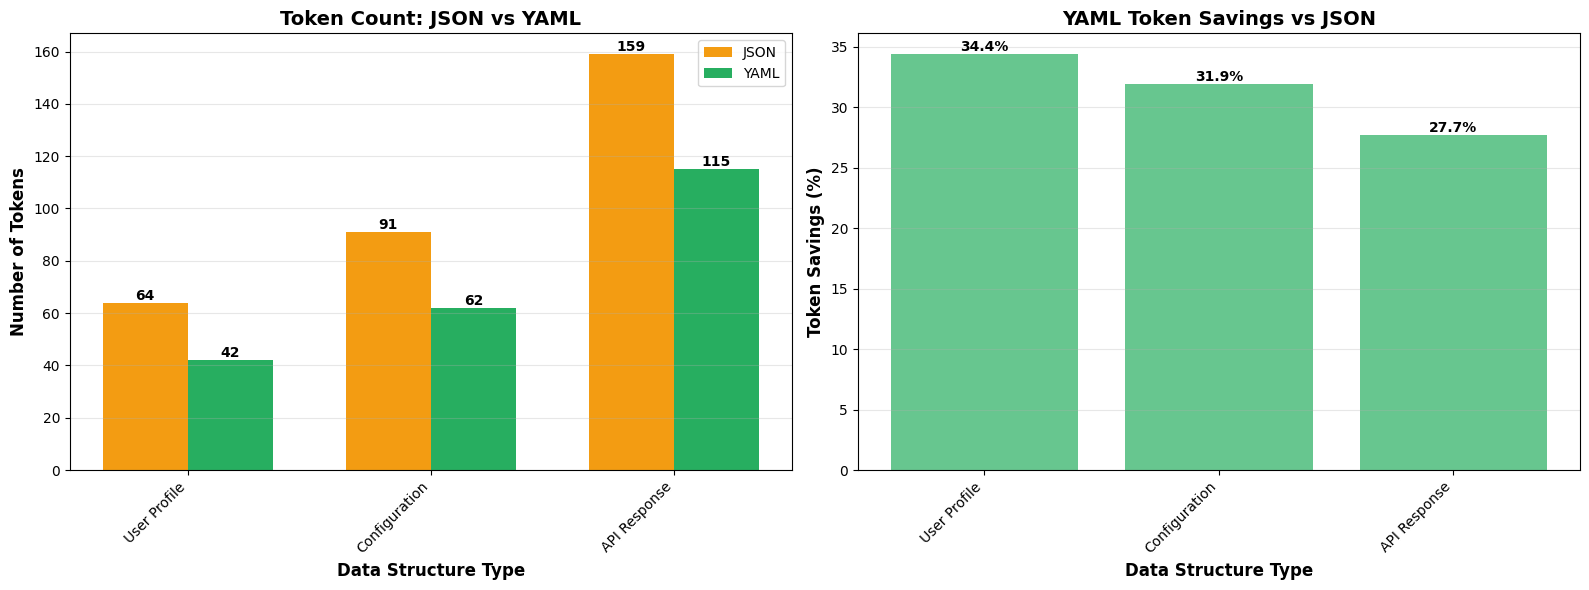


📊 OVERALL SUMMARY
Total JSON tokens:  314
Total YAML tokens:  219
Total tokens saved: 95
Average savings:    31.3%

💡 YAML saves an average of 31.3% tokens compared to JSON!


In [ ]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Extract data
names = [r["name"] for r in results]
json_tokens = [r["json"] for r in results]
yaml_tokens = [r["yaml"] for r in results]
savings_pct = [r["savings_pct"] for r in results]

# Left chart: Token comparison
x = np.arange(len(names))
width = 0.35

bars1 = ax1.bar(x - width / 2, json_tokens, width, label="JSON", color="#f39c12")
bars2 = ax1.bar(x + width / 2, yaml_tokens, width, label="YAML", color="#27ae60")

ax1.set_xlabel("Data Structure Type", fontsize=12, fontweight="bold")
ax1.set_ylabel("Number of Tokens", fontsize=12, fontweight="bold")
ax1.set_title("Token Count: JSON vs YAML", fontsize=14, fontweight="bold")
ax1.set_xticks(x)
ax1.set_xticklabels(names, rotation=45, ha="right")
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

# Right chart: Savings percentage
bars3 = ax2.bar(names, savings_pct, color="#27ae60", alpha=0.7)
ax2.set_xlabel("Data Structure Type", fontsize=12, fontweight="bold")
ax2.set_ylabel("Token Savings (%)", fontsize=12, fontweight="bold")
ax2.set_title("YAML Token Savings vs JSON", fontsize=14, fontweight="bold")
ax2.set_xticklabels(names, rotation=45, ha="right")
ax2.grid(axis="y", alpha=0.3)

# Add value labels
for bar, val in zip(bars3, savings_pct):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Print summary
avg_savings_pct = np.mean(savings_pct)
total_json = sum(json_tokens)
total_yaml = sum(yaml_tokens)
total_savings = total_json - total_yaml

print("\n" + "=" * 70)
print("📊 OVERALL SUMMARY")
print("=" * 70)
print(f"Total JSON tokens:  {total_json}")
print(f"Total YAML tokens:  {total_yaml}")
print(f"Total tokens saved: {total_savings}")
print(f"Average savings:    {avg_savings_pct:.1f}%")
print(f"\n💡 YAML saves an average of {avg_savings_pct:.1f}% tokens compared to JSON!")
print("=" * 70)

---

# 💡 Best Practices & Key Takeaways

## 🎯 Optimization Strategies

### 1. Language Selection 🌍

```
✅ DO:
- Use English when possible (most token-efficient)
- Consider token costs when supporting multiple languages
- Test your prompts in different languages to compare costs but also accuracy!

⚠️ CONSIDER:
- User experience vs cost trade-offs
- Cultural appropriateness of language choice
- Whether translation adds value
```

### 2. Data Format Choice 📦

```
✅ Use YAML when:
- Sending structured data to LLMs
- Working within tight token limits
- Optimizing for cost
- Human readability matters

✅ Use JSON when:
- Strict parsing requirements
- Working with existing JSON APIs
- Need for widespread tool support
- Compliance/standard requirements
```



---

## 📊 Quick Reference: Token Efficiency

### Language Efficiency (1.0 = baseline)
```
English:     1.0x  ⭐ Most efficient
Spanish:     1.2x
French:      1.3x
German:      1.4x
Japanese:    2.0x
Chinese:     2.5x  ⚠️ Least efficient
```

### Format Efficiency
```
YAML:        1.0x  ⭐ Most efficient
JSON:        1.2x
XML:         1.5x  ⚠️ Least efficient
```

---

## 🎓 Key Learnings

<div style="background-color:rgb(223, 194, 96); padding: 20px; border-left: 5px solid #ffc107; border-radius: 5px; margin: 20px 0;">
    <h3>💡 Remember:</h3>
    <ol>
        <li><strong>Tokens ≠ Words:</strong> Tokenization is subword-level</li>
        <li><strong>Language Matters:</strong> English is 20-50% more token-efficient</li>
        <li><strong>Format Matters:</strong> YAML saves 15-30% vs JSON</li>
        <li><strong>Spaces Count:</strong> Leading spaces affect tokenization</li>
        <li><strong>Cost Impact:</strong> Small optimizations = big savings at scale</li>
    </ol>
</div>

---

## 🛠️ Practical Tools

### For Your Projects:

1. **Token Counter Function:**
   ```python
   def count_tokens(text):
       encoding = tiktoken.get_encoding("cl100k_base")
       return len(encoding.encode(text))
   ```

2. **Cost Calculator:**
   ```python
   def calculate_cost(text, cost_per_1k=0.03):
       tokens = count_tokens(text)
       return (tokens / 1000) * cost_per_1k
   ```

3. **Format Optimizer:**
   ```python
   def optimize_format(data):
       yaml_str = yaml.dump(data)
       json_str = json.dumps(data)
       return yaml_str if count_tokens(yaml_str) < count_tokens(json_str) else json_str
   ```

---

## 📚 Additional Resources

- 📖 [TikToken Documentation](https://github.com/openai/tiktoken)
- 🎯 [OpenAI Tokenizer Tool](https://platform.openai.com/tokenizer)
- 💰 [OpenAI Pricing Calculator](https://openai.com/pricing)
- 📊 [Token Optimization Guide](https://help.openai.com/en/articles/4936856)

---